# Weather image recognition

In [146]:
import os
import glob
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import math
import numpy as np
import matplotlib.pyplot as plt

print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.10.1


### Functions

In [147]:
def plot_history_acc_loss(history):
    epochs = np.arange(len(history.history['val_loss'])) + 1
    fig = plt.figure(figsize=(12, 4))
    if 'acc' in history.history:
        ax1 = fig.add_subplot(121)
        ax1.plot(epochs, history.history['loss'], c='r', label='Train loss')
        ax1.plot(epochs, history.history['val_loss'], c='k', label='Valid loss')
        plt.legend(loc='lower left');
        plt.grid(True)

        ax1 = fig.add_subplot(122)
        ax1.plot(epochs, history.history['acc'], c='r', label='Train acc')
        ax1.plot(epochs, history.history['val_acc'], c='k', label='Valid acc')
        plt.legend(loc='lower right');
        plt.grid(True)

    else:
        ax1 = fig.add_subplot(111)
        ax1.plot(epochs, history.history['loss'], c='r', label='Train loss')
        ax1.plot(epochs, history.history['val_loss'], c='k', label='Valid loss')
        plt.legend(loc='lower left');
        plt.grid(True)

    plt.show()
    
def get_nb_files(directory):
    count = 0
    for r, dirs, files in os.walk(directory):
        for dr in dirs:
              count += len(glob.glob(os.path.join(r, dr + "/*")))
    return count

### Model hyperparameters

In [148]:
batch_size = 32
epochs = 12

### Data paths

In [149]:
local_folder = './dataset'
train_dir = local_folder + '/train'
valid_dir = local_folder + '/valid'
test_dir = local_folder + '/test'

### Load datasets

In [150]:
datagen = ImageDataGenerator(rescale = 1./255, horizontal_flip=True, vertical_flip=True, rotation_range=10)

target_image_size = (64, 64)

train_dataset = datagen.flow_from_directory(train_dir,
                                                  target_size = target_image_size,
                                                  batch_size = batch_size,
                                                  class_mode="categorical")

test_dataset = datagen.flow_from_directory(test_dir,
                                                target_size = target_image_size,
                                                batch_size = batch_size,
                                                class_mode="categorical")

valid_dataset = datagen.flow_from_directory(valid_dir,
                                                  target_size = target_image_size,
                                                  batch_size = batch_size,
                                                  class_mode="categorical")

Found 5484 images belonging to 11 classes.
Found 696 images belonging to 11 classes.
Found 682 images belonging to 11 classes.


### Number of images each dataset contains

In [151]:
num_train_examples = get_nb_files(train_dir)
num_test_examples = get_nb_files(valid_dir)
num_valid_examples = get_nb_files(test_dir)

## Convolutional Neural Network model

In [152]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape = (64, 64, 3)))
model.add(tf.keras.layers.MaxPooling2D(strides = 2))
model.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(strides = 2))
model.add(tf.keras.layers.Flatten(input_shape=(16, 16, 32)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(11, activation='softmax'))

In [153]:
model.compile(optimizer='adam', 
              loss=tf.keras.losses.CategoricalCrossentropy(), 
              metrics=['acc'])

In [154]:
tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [155]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 8192)              0         
                                                                 
 dense_18 (Dense)            (None, 128)              

## Model training

In [156]:
history = model.fit(train_dataset, epochs=epochs, validation_data=valid_dataset)

Epoch 1/12
172/172 [==============================] - 30s 174ms/step - loss: 1.5043 - acc: 0.4894 - val_loss: 1.2276 - val_acc: 0.5909
Epoch 2/12
172/172 [==============================] - 30s 172ms/step - loss: 1.2081 - acc: 0.5848 - val_loss: 1.3971 - val_acc: 0.5103
Epoch 3/12
172/172 [==============================] - 28s 162ms/step - loss: 1.1081 - acc: 0.6089 - val_loss: 1.0393 - val_acc: 0.6569
Epoch 4/12
172/172 [==============================] - 31s 182ms/step - loss: 1.0525 - acc: 0.6368 - val_loss: 1.0118 - val_acc: 0.6364
Epoch 5/12
172/172 [==============================] - 29s 168ms/step - loss: 1.0097 - acc: 0.6464 - val_loss: 1.1522 - val_acc: 0.6114
Epoch 6/12
172/172 [==============================] - 31s 180ms/step - loss: 0.9724 - acc: 0.6637 - val_loss: 0.9400 - val_acc: 0.6789
Epoch 7/12
172/172 [==============================] - 31s 178ms/step - loss: 0.9221 - acc: 0.6794 - val_loss: 0.9497 - val_acc: 0.6701
Epoch 8/12
172/172 [==============================] - 3

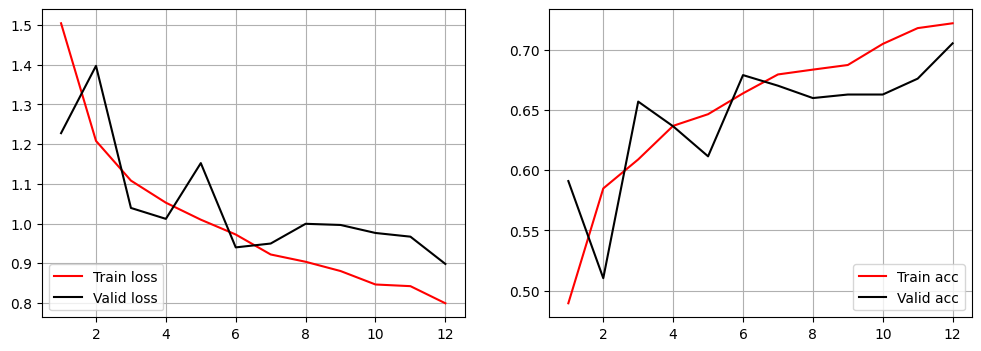

In [158]:
plot_history_acc_loss(history)

## Train and test datasets accuracy

In [159]:
train_loss, train_accuracy = model.evaluate(train_dataset, steps=math.ceil(num_train_examples / batch_size))
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples / batch_size))

print('Train accuracy: {:.2f}%'.format(100*train_accuracy))
print('Test accuracy: {:.2f}%'.format(100*test_accuracy))

22/22 [==============================] - 4s 163ms/step - loss: 0.9393 - acc: 0.6882
Train accuracy: 74.87%
Test accuracy: 68.82%


### Saving the model

In [ ]:
model.save('model')